# Comparison of the models

In this notebook, I will compare the MAPE, MSE and time of ejecutation of the models.

**Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def srt_to_seconds(string):
    if type(string) != str:
        return string
    [hour, minute, second] = np.float_(string.split(':'))
    return second + minute*60 + hour*360

In [3]:
SimpleES = pd.read_csv('../data/results/SimpleES.csv')
Holt = pd.read_csv('../data/results/Holt.csv')
HoltWinters = pd.read_csv('../data/results/HoltWinters.csv')

In [4]:
SimpleES = SimpleES.set_index(HoltWinters.columns[0])
Holt = Holt.set_index(HoltWinters.columns[0])
HoltWinters = HoltWinters.set_index(HoltWinters.columns[0])

In [5]:
df2 = pd.read_csv('../data/results/autoreg.csv')
df2 = df2.set_index(df2.columns[0])

In [6]:
names = [SimpleES, Holt, HoltWinters]

mape = []
mse = []
time = []
for name in names:
    for metodo in name.columns:
        mape.append(name.loc['MAPE', metodo])
        mse.append(name.loc['MSE', metodo])
        time.append(name.loc['Time', metodo])

In [7]:
df = pd.DataFrame([mape, mse, time], columns=['SES1', 'SES2', 'SES3', 'Holt1', 'Holt2', 'Holt3', 'HW1', 'HW2', 'HW3', 'HW4'], index=['MAPE', 'MSE', 'Time'])
df = df.T

In [8]:
df.loc['SARIMA'] = [14.31, 17610999854.718975, '00:23:50.00']

In [9]:
df.loc['Prophet'] = [10.67, 17677685.275017653, '00:22:48']

In [10]:
df['Time'] = df['Time'].apply(srt_to_seconds)

In [11]:
for name in df2.index:
    df.loc[name] = df2.loc[name]

In [12]:
df3 = df.loc[df.index[6:]]
df3

,MAPE,MSE,Time
HW1,24.130425263874898,101331982049.58644,0.976452
HW2,17.089567083221226,41059889182.6787,1.551879
HW3,21.92565177282149,77727479920.88379,0.962641
HW4,15.750295387176664,30742572010.27659,1.379397
SARIMA,14.31,17610999854.718975,1430.000000
Prophet,10.67,17677685.275018,1368.000000
RF1,18.820462,50238635.61543,96.238158
RF2,19.039458,44949987.364055,635.349198
XGB1,13.12879,24235647.846426,17.304973
XGB2,19.039458,44949987.364055,623.785312


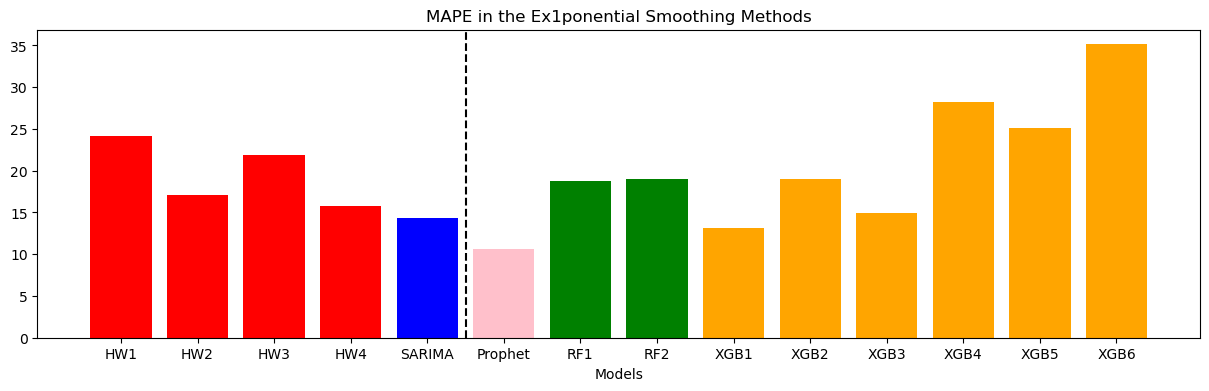

In [22]:
x1 = list(df3.index.values)
y1 = list(np.float_(df3['MAPE']))

plt.rcParams["figure.figsize"] = (15,4)
plt.bar(x1, y1, color=['red', 'red', 'red', 'red', 'blue', 'pink', 'green', 'green', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange'])
plt.axvline(x=4.5, color='black', linestyle='--')
plt.xlabel('Models')
plt.ylabel('')
plt.title('MAPE in the Ex1ponential Smoothing Methods')
plt.show()

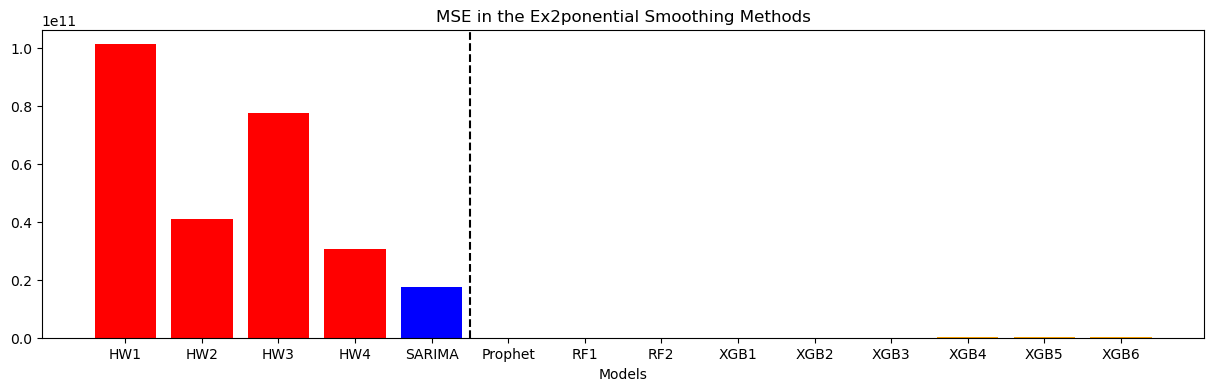

In [23]:
x2 = list(df3.index.values)
y2 = list(np.float_(df3['MSE']))

plt.rcParams["figure.figsize"] = (15,4)
plt.bar(x2, y2, color=['red', 'red', 'red', 'red', 'blue', 'pink', 'green', 'green', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange'])
plt.axvline(x=4.5, color='black', linestyle='--')
plt.xlabel('Models')
plt.ylabel('')
plt.title('MSE in the Ex2ponential Smoothing Methods')
plt.show()

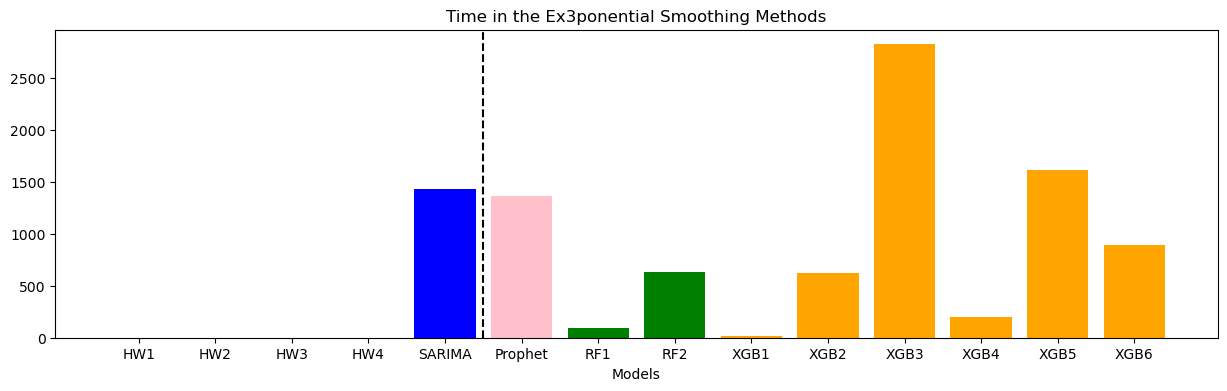

In [24]:
x3 = list(df3.index.values)
y3 = list(np.float_(df3['Time']))

plt.rcParams["figure.figsize"] = (15,4)
plt.bar(x3, y3, color=['red', 'red', 'red', 'red', 'blue', 'pink', 'green', 'green', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange'])
plt.axvline(x=4.5, color='black', linestyle='--')
plt.xlabel('Models')
plt.ylabel('')
plt.title('Time in the Ex3ponential Smoothing Methods')
plt.show()

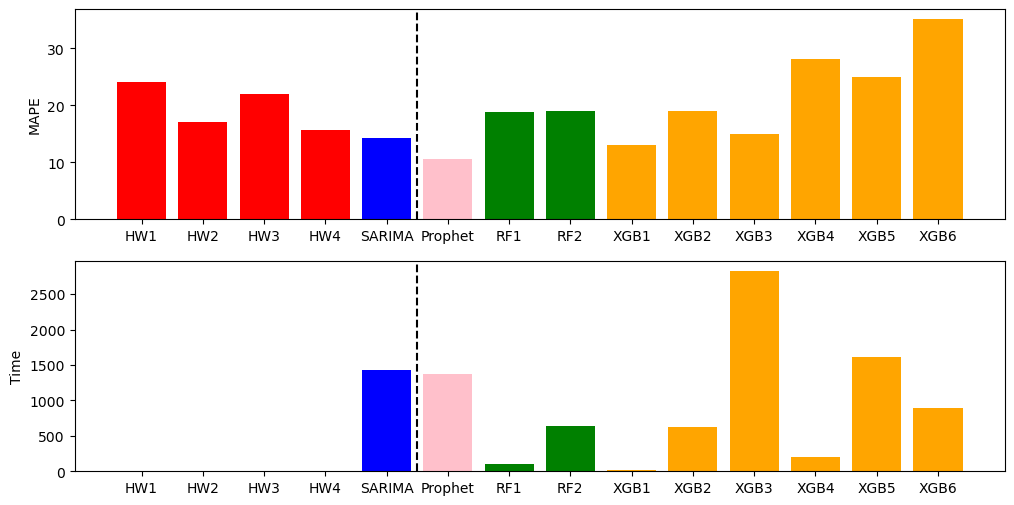

In [26]:
fig, (ax, cx) = plt.subplots(2,1, figsize=(12,6))


ax.bar(x1, y1, color=['red', 'red', 'red', 'red', 'blue', 'pink', 'green', 'green', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange'])
ax.set_xlabel('')
ax.axvline(x=4.5, color='black', linestyle='--')
ax.set_ylabel('MAPE')
ax.set_title('')

cx.bar(x3, y3, color=['red', 'red', 'red', 'red', 'blue', 'pink', 'green', 'green', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange'])
cx.axvline(x=4.5, color='black', linestyle='--')
cx.set_xlabel('')
cx.set_ylabel('Time')
cx.set_title('')

plt.savefig("../graphs/comp_final.png")